make_filepath_list関数を試す

In [1]:
from voc import make_filepath_list

rootpath = './data/VOCdevkit/VOC2012/'

tr_img, tr_anno, val_img, val_anno = make_filepath_list(rootpath)


print(tr_img[0])
print(tr_anno[0])
print(val_img[0])
print(val_anno[0])




./data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000008.xml
./data/VOCdevkit/VOC2012/JPEGImages/2008_000002.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000002.xml


In [2]:
import cv2
from voc import GetBBoxAndLabel


voc_labels = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow',
    'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train',
    'tvmonitor'
]

annotation = GetBBoxAndLabel(voc_labels)

index = 1
img_path = val_img[index]

img = cv2.imread(img_path)
height, width, _ = img.shape

annotation(val_anno[index],
           width,
           height)

array([[ 0.09      ,  0.03003003,  0.998     ,  0.996997  , 18.        ],
       [ 0.122     ,  0.56756757,  0.164     ,  0.72672673, 14.        ]])

In [3]:
import matplotlib.pyplot as plt

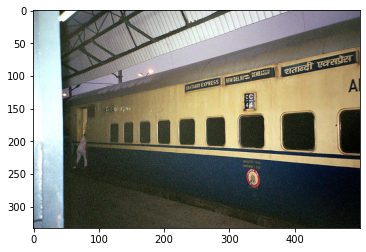

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(375, 500, 3)


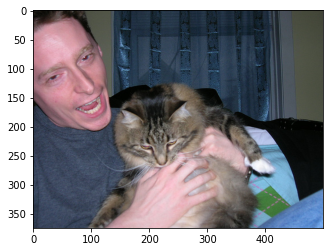

In [5]:
import cv2
from voc import DataTransform

import matplotlib.pyplot as plt
%matplotlib inline

img_file_path = tr_img[19]
img = cv2.imread(img_file_path)
print(img.shape)
height, width, _ = img.shape

gb1 = GetBBoxAndLabel(voc_labels)

bbox_label = gb1(tr_anno[19], width, height)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

/home/komuro/Documents/ssdbook/augmentation.py:238: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


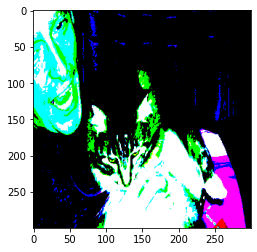

In [6]:
color_mean = (104, 117, 123)
input_size = 300

transform = DataTransform(input_size, color_mean)

phase = 'train'

img_transformed, boxes, labels = transform(
    img, phase, bbox_label[:, :4],
    bbox_label[:, 4]
)

plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


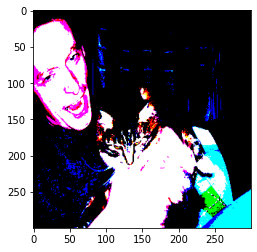

In [7]:
phase = 'val'

img_transformed, boxes, labels = transform(
    img,
    phase,
    bbox_label[:, :4],
    bbox_label[:, 4]
)

plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
from voc import PreprocessVOC2012

color_mean = (104, 117, 123)
input_size = 300

tr_data = PreprocessVOC2012(
    tr_img,
    tr_anno,
    phase='train',
    transform=DataTransform(input_size, color_mean),
    get_bbox_label=GetBBoxAndLabel(voc_labels)
)

val_data = PreprocessVOC2012(
    val_img,
    val_anno,
    phase='val',
    transform=DataTransform(input_size, color_mean),
    get_bbox_label=GetBBoxAndLabel(voc_labels)
)

batch = tr_data.__getitem__(1)
print(len(batch))

2


In [9]:
print(batch[0].shape)
print(batch[1].shape)
print(batch)

torch.Size([3, 300, 300])
(1, 5)
(tensor([[[  74.0000,   75.3600,   77.6000,  ...,  -57.4000,  -54.0400,
           -52.0000],
         [  78.6550,   80.5981,   83.7985,  ...,  -57.4000,  -54.0400,
           -52.0000],
         [  88.0917,   91.2168,   96.3642,  ...,  -57.4000,  -54.0400,
           -52.0000],
         ...,
         [  23.5083,   19.2442,   12.2208,  ...,  -95.0075, -101.0228,
          -104.6750],
         [   9.1050,    9.0625,    8.9925,  ...,  -90.9845,  -96.7217,
          -100.2050],
         [   2.0000,    4.0400,    7.4000,  ...,  -89.0000,  -94.6000,
           -98.0000]],

        [[  52.0000,   53.3600,   55.6000,  ...,  -47.0000,  -41.4000,
           -38.0000],
         [  56.6550,   58.5981,   61.7985,  ...,  -47.0000,  -41.4000,
           -38.0000],
         [  66.0917,   69.2168,   74.3642,  ...,  -47.0000,  -41.4000,
           -38.0000],
         ...,
         [  23.0250,   19.4408,   13.5375,  ..., -104.5242, -110.5395,
          -114.1917],
      

In [10]:
import torch.utils.data as data

from voc import multiobject_collate_fn

batch_size = 4

tr_batch = data.DataLoader(
    tr_data,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=multiobject_collate_fn
)

val_batch = data.DataLoader(
    val_data,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=multiobject_collate_fn
)

dataloaders_dict = {'train': tr_batch, 'val': val_batch}

print('訓練データのサイズ:', tr_data.__len__())
print('検証データのサイズ:', val_data.__len__())
print('訓練データのミニバッチのサイズ:', len(dataloaders_dict['train']))
print('検証データのミニバッチのサイズ:', len(dataloaders_dict['val']))

batch_iterator = iter(dataloaders_dict['train'])

images, targets = next(batch_iterator)

print('ミニバッチのイメージの形状:', images.size())
print('ミニバッチのtargetsのサイズ:', len(targets))
print('targets[1]の形状:', targets[1].size())

訓練データのサイズ: 5717
検証データのサイズ: 5823
訓練データのミニバッチのサイズ: 1430
検証データのミニバッチのサイズ: 1456
ミニバッチのイメージの形状: torch.Size([4, 3, 300, 300])
ミニバッチのtargetsのサイズ: 4
targets[1]の形状: torch.Size([5, 5])


In [12]:
tr_batch

In [13]:
a = iter(tr_batch)